# **Final Project**

**Mutual Fund Investment Recomendation based on Risk Profile Customer**

**Notebook Forecasting - Schroder Dana Prestasi Plus**

##  **1. Introduction** 

**Group name : Anminve$ting**


Member:

- Aan Nurliyanah
- Ajeng Nilta Adriani
- Fachmi Maris
- Muhammad Fawwaz Dynoeputra
- Ropiudin 


## Problem Statement
The risk in investment is the fundamental which everyone should know and understand. 
However, the main problem that usually found that the new investor does’nt understand where the differences between high risk and low risk. For that, we want to build a recomendation for customer how to choose Mutual fund Investment based on risk profile customer. 
                                                                                                                

## **2. Import Libraries** 

In [1]:
# using for change data type
from datetime import datetime

# using for calculation
import numpy as np
import pandas as pd

# using for visualization
import matplotlib.pylab as plt
%matplotlib inline


# using for model evaluation 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# using for visualization foreacsting
from statsmodels.tsa.seasonal import seasonal_decompose


# using for Modeling
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


import warnings
warnings.filterwarnings(action='ignore')

## **3. Data Loading** 

Data loading using pd.read_csv, source of dataset is from investing.com in Funds part , dataset date from last 5 years per week.

In [2]:
df= pd.read_csv('Shcroder_Dana_Prestasi_Plus.csv.xls')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","34,015.461","33,941.512","34,241.578","33,864.031",0.42%
1,"Dec 04, 2022","33,872.602","35,026.199","35,026.199","33,872.602",-3.83%
2,"Nov 27, 2022","35,222.809","34,356.512","35,222.809","34,356.512",2.58%
3,"Nov 20, 2022","34,338.172","34,045.371","34,453.359","33,940.512",1.12%
4,"Nov 13, 2022","33,958.129","34,126.090","34,191.059","33,809.199",-1.18%
...,...,...,...,...,...,...
302,"Jan 29, 2017","29,760.340","29,760.340","29,760.340","29,760.340",0.62%
303,"Jan 22, 2017","29,577.289","29,577.289","29,577.289","29,577.289",0.70%
304,"Jan 15, 2017","29,371.279","29,371.279","29,371.279","29,371.279",-0.53%
305,"Jan 08, 2017","29,528.539","29,528.539","29,528.539","29,528.539",-1.51%


Using data info to see description from the dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      307 non-null    object
 1   Price     307 non-null    object
 2   Open      307 non-null    object
 3   High      307 non-null    object
 4   Low       307 non-null    object
 5   Change %  307 non-null    object
dtypes: object(6)
memory usage: 14.5+ KB


## **4. Data Cleaning**

- Replace string ',' in columns ['Price',	'Open',	'High',	'Low'], and change type from object to float.
- Replace '%' in columns 'change %', and change type from object to flat.
- Change column 'date' from object to datetime

In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      307 non-null    datetime64[ns]
 1   Price     307 non-null    float64       
 2   Open      307 non-null    float64       
 3   High      307 non-null    float64       
 4   Low       307 non-null    float64       
 5   Change %  307 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.5 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,34015.461,33941.512,34241.578,33864.031,0.42
1,2022-12-04,33872.602,35026.199,35026.199,33872.602,-3.83
2,2022-11-27,35222.809,34356.512,35222.809,34356.512,2.58
3,2022-11-20,34338.172,34045.371,34453.359,33940.512,1.12
4,2022-11-13,33958.129,34126.090,34191.059,33809.199,-1.18
...,...,...,...,...,...,...
302,2017-01-29,29760.340,29760.340,29760.340,29760.340,0.62
303,2017-01-22,29577.289,29577.289,29577.289,29577.289,0.70
304,2017-01-15,29371.279,29371.279,29371.279,29371.279,-0.53
305,2017-01-08,29528.539,29528.539,29528.539,29528.539,-1.51


Dataset ready to use in next step.

## **5. EDA (Exploratory Data Analysis)**

Plotting columns Price, Open, High, Low to see historical in last 5 years. 

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

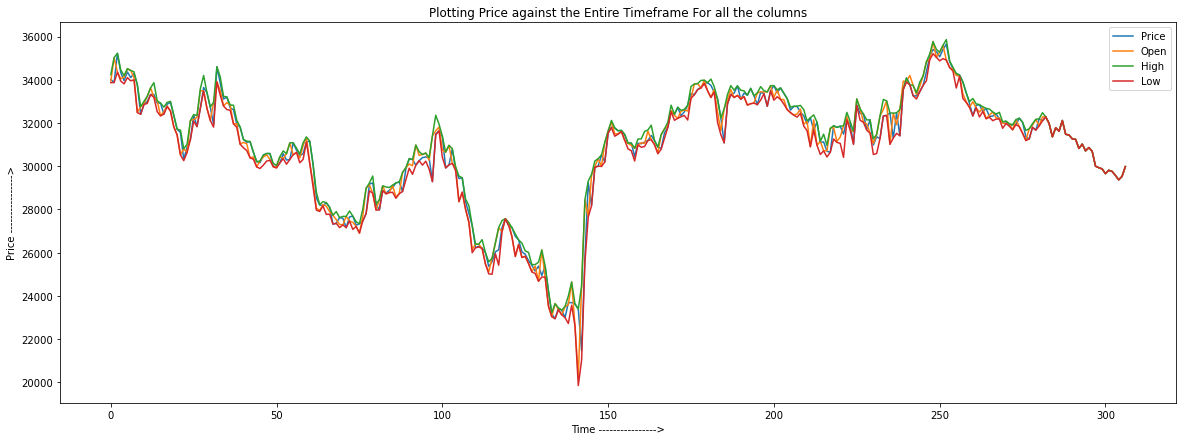

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

Sort Date ascending to make analysis easier to calculate. 

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,306,2017-01-01,29982.369,29982.369,29982.369,29982.369,1.07
1,305,2017-01-08,29528.539,29528.539,29528.539,29528.539,-1.51
2,304,2017-01-15,29371.279,29371.279,29371.279,29371.279,-0.53
3,303,2017-01-22,29577.289,29577.289,29577.289,29577.289,0.70
4,302,2017-01-29,29760.340,29760.340,29760.340,29760.340,0.62
...,...,...,...,...,...,...,...
302,4,2022-11-13,33958.129,34126.090,34191.059,33809.199,-1.18
303,3,2022-11-20,34338.172,34045.371,34453.359,33940.512,1.12
304,2,2022-11-27,35222.809,34356.512,35222.809,34356.512,2.58
305,1,2022-12-04,33872.602,35026.199,35026.199,33872.602,-3.83


Make new datset for deep analysis contains only Date, High and Low columns. 

In [11]:
new_df=df[['Date','High','Low']]

Make date as index for foreacasting required. 

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-01-01,29982.369,29982.369
2017-01-08,29528.539,29528.539
2017-01-15,29371.279,29371.279
2017-01-22,29577.289,29577.289
2017-01-29,29760.340,29760.340
...,...,...
2022-11-13,34191.059,33809.199
2022-11-20,34453.359,33940.512
2022-11-27,35222.809,34356.512


Saving dataset for deploy requirement. 

In [37]:
new_df.to_csv('Schroder Dana Prestasi Plus_HL.csv')

Plotting High and Low price for last 5 years using new dataset.

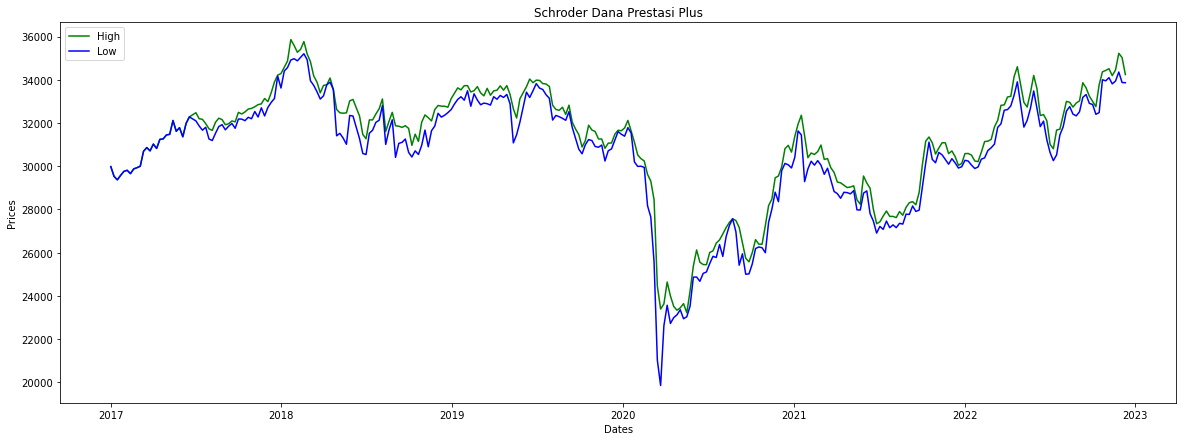

In [39]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Schroder Dana Prestasi Plus')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **6. Data Preprocessing**

Plotting seasonality on the data

<Figure size 1152x648 with 0 Axes>

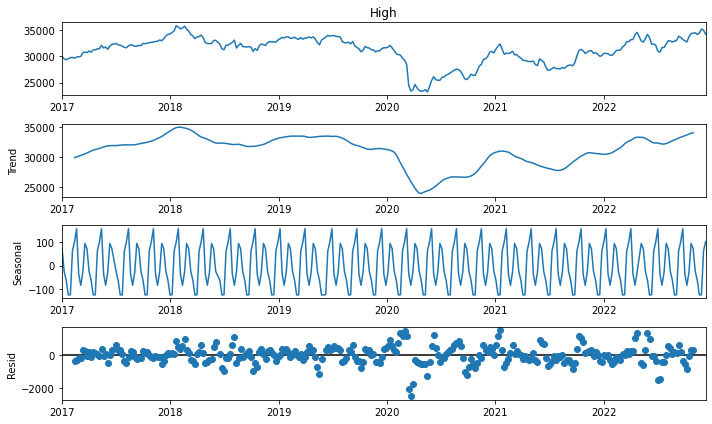

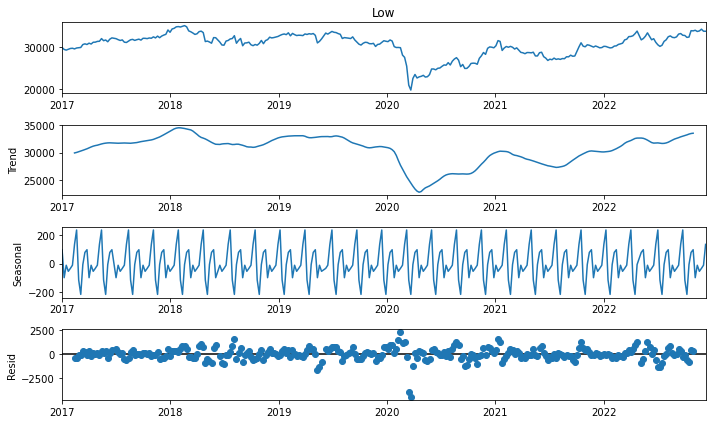

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

As we see in the plot, the data doesn't contain seasonality and trend.

### Spliting data into Train and Test

Train data contains 90 % , and test 10 %. 

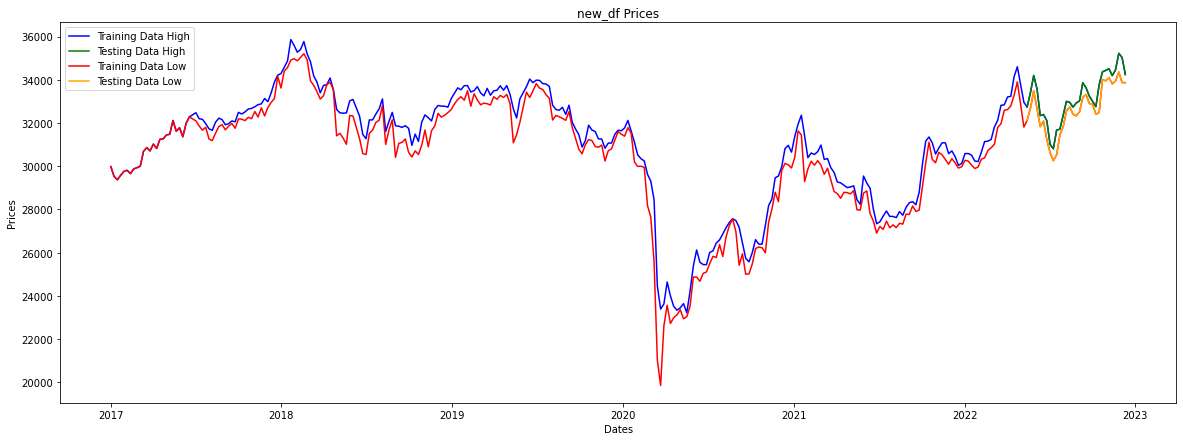

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-01-01,29982.369,29982.369
2017-01-08,29528.539,29528.539
2017-01-15,29371.279,29371.279
2017-01-22,29577.289,29577.289
2017-01-29,29760.340,29760.340
...,...,...
2022-04-03,33203.410,32620.881
2022-04-10,33234.121,32789.820
2022-04-17,34139.172,33280.711


In [19]:
test_data

,High,Low
Date,,
2022-05-15,32737.980,32121.939
2022-05-22,33404.711,32680.689
2022-05-29,34199.230,33482.000
2022-06-05,33581.480,32673.660
2022-06-12,32343.090,31832.490
2022-06-19,32389.930,32086.631
2022-06-26,32108.439,31228.820
2022-07-03,31011.369,30632.480
2022-07-10,30808.340,30258.471


## **7. Modeling**

### **7.1 Model Definition**

We will use ARIMA for the time series prediction

### **7.2 Model Training**

In [20]:
!pip install pmdarima

using auto_arima to searching best order that will use in Arima Model implementation in coloumn 'High'

In [21]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4805.276, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4747.884, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4725.318, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4793.986, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4709.647, Time=1.34 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(0,1,3)[4]             : AIC=inf, Time=1.53 sec
 ARIMA(0,1,1)(1,1,3)[4]             : AIC=inf, Time=3.37 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=4720.329, Time=0.96 sec
 ARIMA(1,1,1)(0,1,2)[4]             : AIC=4711.216, Time=2.33 sec
 ARIMA(0,1,2)(0,1,2)[4]             : AIC=4710.702, Time=1.44 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=4711.411, Time=0.98 sec
 ARIMA(1,1,2)(0,1,2)[4]             : AIC=4713.716, Time=2.48 sec
 ARIMA(0,1,1)(0,1,2)[4] intercept   : AIC=4711.310, T

using auto_arima to searching best order that will use in Arima Model implementation in coloumn 'Low'

In [22]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4957.922, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4900.711, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4875.738, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4957.918, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=4858.070, Time=0.86 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=4900.596, Time=0.27 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=1.88 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4862.142, Time=0.88 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=4893.359, Time=0.43 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=inf, Time=3.19 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=4857.923, Time=0.71 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=4875.480, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=4900.339, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=4859.1

Model training using result from auto arima with order = 1,1,1 in column 'High'

In [24]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(1,1,1))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


Model training using result from auto arima with order = 1,1,1 in column 'Low'

In [25]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(1,1,1))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **7.3 Model Evaluasi**

Plotting Schroder Dana Prestasi High Price on data test

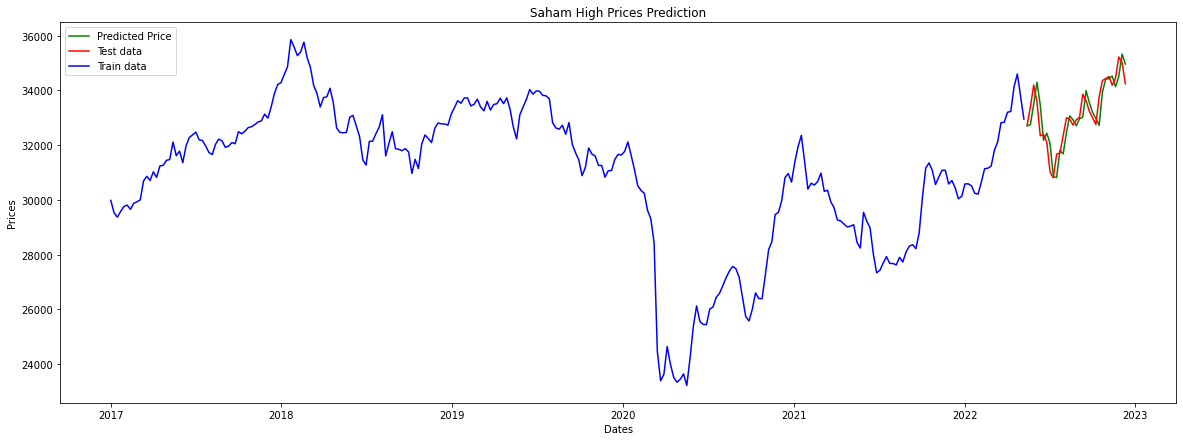

In [26]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Plotting Schroder Dana Prestasi Low Price on data test

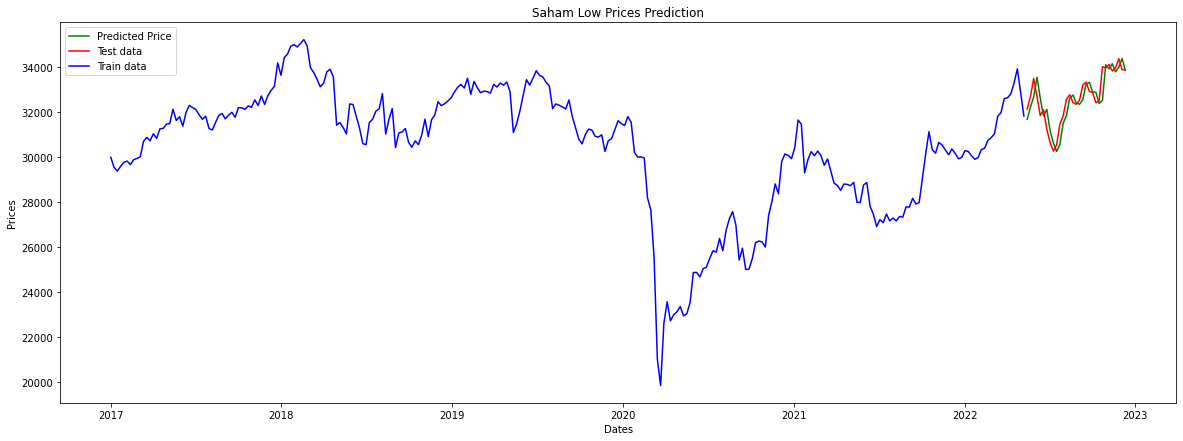

In [27]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Create dataset from prediction result vs Actual result on data test

In [28]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,32737.980,32701.578710,32121.939,31666.242529
1,33404.711,32756.142093,32680.689,32211.605276
2,34199.230,33497.568979,33482.000,32659.433488
3,33581.480,34299.200452,32673.660,33536.282158
4,32343.090,33467.944201,31832.490,32603.428624
5,32389.930,32180.565848,32086.631,31820.586852
6,32108.439,32437.407252,31228.820,32107.162281
7,31011.369,32054.163621,30632.480,31169.284424
8,30808.340,30855.972998,30258.471,30629.842530
9,31672.730,30817.220157,30525.840,30237.268935


As we can see from visualization, the prediction result is good enough and close to actual result. Lets see from evaluation model. 

In [30]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

create dataframe from result of model evaluation based on Mean, MAE, MSE, RMSE, MAPE.

In [31]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,31122.188143,435.519584,295208.248016,543.330699,0.013128
1,Low,30599.186720,432.734122,292167.966143,540.525639,0.013297


The prediction result is pretty good, the MAPE result show that the error result only 1,3 %. Which means the accuracy of prediction is 98,7 %. 

## **8. Prediction**

We will create new date that we will predict, the last date on the data is on 2022-12-11 , so we countinue to predict 4 weeks ahead start from 2022-12-18. 

In [32]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


Apply model to predict High price

In [33]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,34972.243051
2022-12-25,34971.239811
2023-01-01,34971.367602
2023-01-08,34971.351325


Saving dataset for deploy requirement.

In [40]:
forecast_High.to_csv('SDPP High Forecast.csv')

Apply model to predict Low price

In [34]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,33853.292912
2022-12-25,33844.504729
2023-01-01,33848.761865
2023-01-08,33846.699641


Saving dataset for deploy requirement.

In [41]:
forecast_Low.to_csv('SDPP Low Forecast.csv')

Plotting the prediction result. 

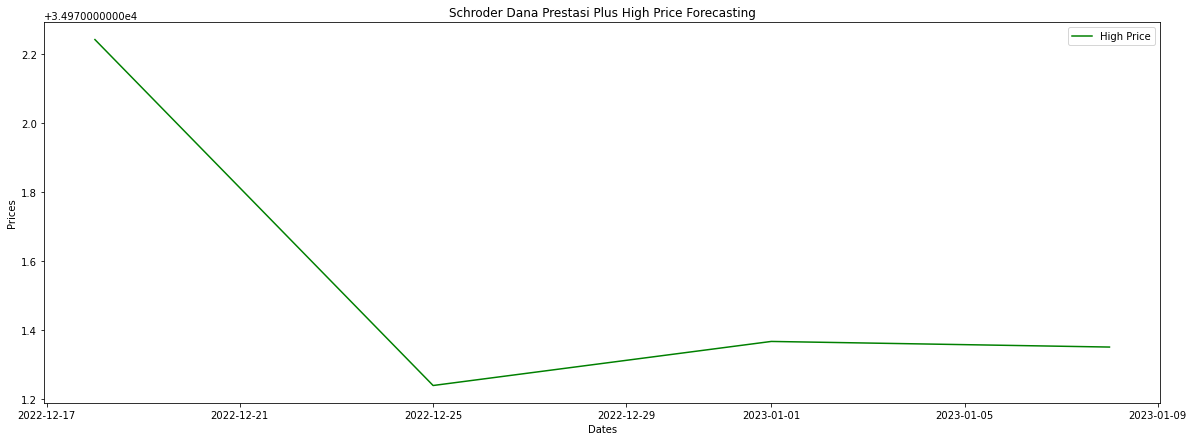

In [42]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='High Price')
plt.title('Schroder Dana Prestasi Plus High Price Forecasting')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

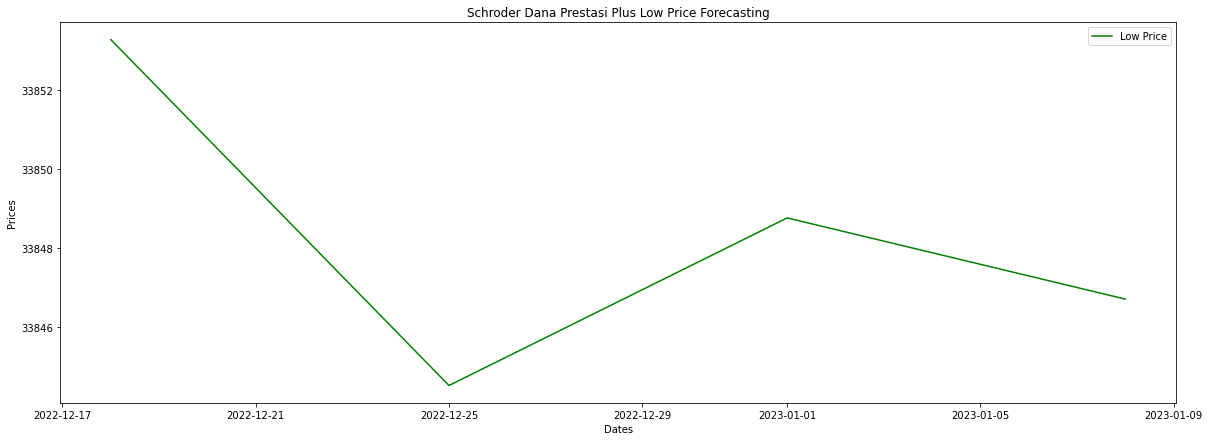

In [43]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Low Price')
plt.title('Schroder Dana Prestasi Plus Low Price Forecasting')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **9.Conclusion**

From this forecasting analysis we can conclude that :
- ARIMA model have good result for forecasting case in this dataset.
- The accuracy according to MAPE error result is 98.7 % with error 1,3 % 
- The model running good in predict 4 weeks ahead in High and Low price. 
